In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing
df = pd.read_csv('C:\\Users\\USER\\Desktop\\FYP\\fyp-sandbox-2\\Data\\Reg_Model_Training/clean_data_model_building_ready.csv')
df

,caseid,age_yrs,age_bin_enc,gender_enc,origin_country_enc,wt_kg
0,18690315,9.00,4,1,0,23.00
1,18690334,18.00,5,0,1,61.80
2,18690432,14.00,5,0,3,57.00
3,18690568,1.00,2,1,1,10.00
4,18690589,0.25,1,0,1,11.00
...,...,...,...,...,...,...
39650,24795513,16.00,5,0,1,65.00
39651,24798894,12.00,4,1,1,41.73
39652,24799324,16.00,5,1,1,78.93
39653,24799665,0.17,1,0,1,4.95


In [3]:
df.isna().sum()

caseid                0
age_yrs               0
age_bin_enc           0
gender_enc            0
origin_country_enc    0
wt_kg                 0
dtype: int64

Need to normalize the age values. But to do that, we need to know the distribution of the age values

### Age values distribution

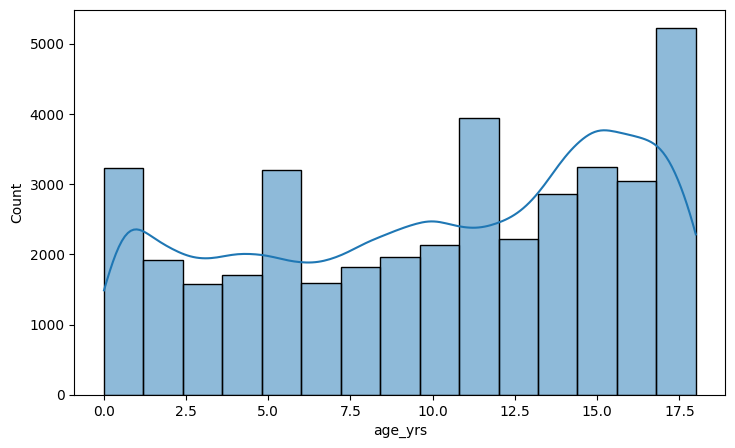

In [12]:
plt.figure(figsize=(8.4,5))
sns.histplot(df, x='age_yrs', kde=True, bins= 15)
plt.show()

In [13]:
#Summary statistics of the age values
df['age_yrs'].describe()

count    39655.000000
mean        10.137866
std          5.480704
min          0.010000
25%          5.000000
50%         11.000000
75%         15.000000
max         18.000000
Name: age_yrs, dtype: float64

Data seems to be evenly spread (close) by looking at the percentiles and closer to a normal distribution by looking at the mean and median but the standard deviation is quite large. Therefore doing a normality test using Shapiro-Wilk test would be a better idea to test the normality. If the p value is larger than 0.05, we can take it as normally distriubted

In [14]:
from scipy.stats import shapiro

stat, p = shapiro(df['age_yrs'])
print(f'Shapiro-Wilk test: stat={stat}, p={p}')
if p < 0.05:
    print("Data is likely not normal.")
else:
    print("Data is likely normal.")

Shapiro-Wilk test: stat=0.932626677014345, p=2.0572359378336404e-82
Data is likely not normal.


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 39655.
  res = hypotest_fun_out(*samples, **kwds)


Since the data is not normally distributed, min-max can be used to normalize the age values

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

df['age_norm'] = scaler.fit_transform(df[['age_yrs']])
df

,caseid,age_yrs,age_bin_enc,gender_enc,origin_country_enc,wt_kg,age_norm
0,18690315,9.00,4,1,0,23.00,0.499722
1,18690334,18.00,5,0,1,61.80,1.000000
2,18690432,14.00,5,0,3,57.00,0.777654
3,18690568,1.00,2,1,1,10.00,0.055031
4,18690589,0.25,1,0,1,11.00,0.013341
...,...,...,...,...,...,...,...
39650,24795513,16.00,5,0,1,65.00,0.888827
39651,24798894,12.00,4,1,1,41.73,0.666481
39652,24799324,16.00,5,1,1,78.93,0.888827
39653,24799665,0.17,1,0,1,4.95,0.008894


In [5]:
df.sort_values(by=['age_norm'], ascending = True)

,caseid,age_yrs,age_bin_enc,gender_enc,origin_country_enc,wt_kg,age_norm
1324,18907800,0.01,0,0,3,3.240,0.0
9514,20308229,0.01,0,0,7,3.406,0.0
31093,23671688,0.01,0,1,3,3.180,0.0
30393,23594473,0.01,0,1,25,3.800,0.0
31178,23677746,0.01,0,0,1,2.540,0.0
...,...,...,...,...,...,...,...
18541,21829701,18.00,5,1,1,65.669,1.0
18544,21829819,18.00,5,1,1,70.748,1.0
18545,21830003,18.00,5,1,1,60.771,1.0
31292,23691928,18.00,5,1,1,78.300,1.0


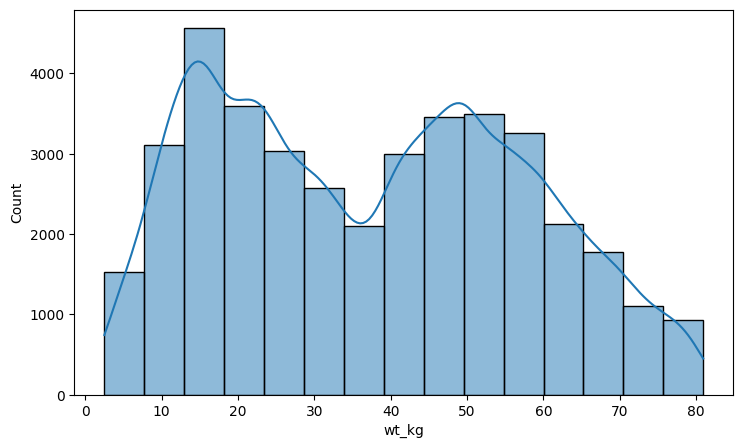

In [21]:
#Distribution of weight values
plt.figure(figsize=(8.5,5))
sns.histplot(df, x='wt_kg', kde= True, bins = 15)
plt.show()

In [6]:
df= df[['caseid', 'age_yrs', 'age_norm', 'age_bin_enc', 'gender_enc', 'origin_country_enc', 'wt_kg']]
df.head()

,caseid,age_yrs,age_norm,age_bin_enc,gender_enc,origin_country_enc,wt_kg
0,18690315,9.00,0.499722,4,1,0,23.0
1,18690334,18.00,1.000000,5,0,1,61.8
2,18690432,14.00,0.777654,5,0,3,57.0
3,18690568,1.00,0.055031,2,1,1,10.0
4,18690589,0.25,0.013341,1,0,1,11.0


In [7]:
#Export this data
df.to_csv('C:\\Users\\USER\\Desktop\\FYP\\fyp-sandbox-2\\Data\\Reg_Model_Training/model_training_data.csv', index=False)

### Correlation of features against the Target

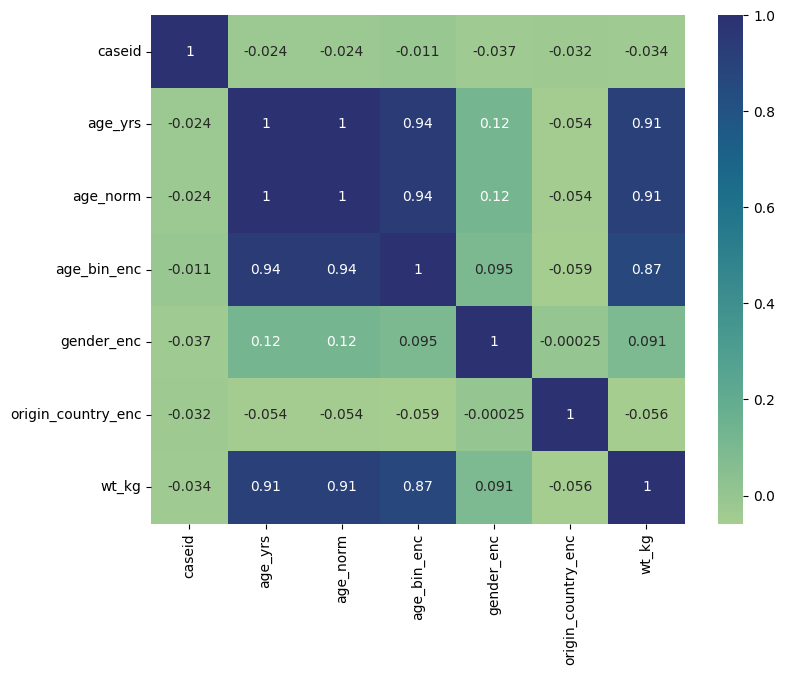

In [10]:
plt.figure(figsize=(8.6,6.6))
sns.heatmap(df.corr(), annot=True, cmap='crest')
plt.show()

Most correlated features with the target variable are:
* age_bin_enc
* age_norm

We'll train models with both all the features and only with highly correlated fatures